## 使用sklearn处理wine和wine_quality数据集

1.用pandas库读取wine数据集和wine_quality数据集

In [1]:
#导入模块
import pandas as pd
#pd.*?
from sklearn.datasets import load_wine

In [2]:
#导入数据
wine_data = load_wine()#wine数据集
quality_data = pd.read_csv('six/winequality-red.csv')#wine_quality数据集

2.将wine数据集和wine_quality数据集的数据和标签拆分开

In [3]:
#wine_data数据集的拆分
wine_X = wine_data.data
wine_Y = wine_data.target
#wine_quality数据集的拆分
quality_Y = quality_data['quality']
quality_X = quality_data.drop('quality',axis=1)

3.将wine_quality数据集划分为训练集和测试集

In [5]:
from sklearn.model_selection import train_test_split
quality_Xtrain,quality_Xtest,quality_Ytrain,quality_Ytest = train_test_split(quality_X,quality_Y,test_size = 0.2,random_state = 123\
                                                                             ,stratify = quality_Y)
#测试集大小为0.2 随机种子编号为123 进行分层抽样
#为了后续操作将wine化为训练集和测试集
wine_Xtrain,wine_Xtest,wine_Ytrain,wine_Ytest = train_test_split(wine_X,wine_Y,test_size = 0.2,random_state = 123,stratify  = wine_Y)

4.标准化wine数据集和wine_quality数据集

In [6]:
#导入标准化函数模块
from sklearn import preprocessing   

In [7]:
#标准差标准化wine数据集
stdScaler = preprocessing.StandardScaler()#生成规则
wine_std_train_Scaler = stdScaler.fit_transform(wine_Xtrain)#将规则应用于训练集
wine_std_test_Scaler = stdScaler.transform(wine_Xtest)#将规则应用于测试集

In [8]:
#离差标准化wine数据集
MMScaler = preprocessing.MinMaxScaler()#生成规则
wine_MM_train_Scaler = MMScaler.fit_transform(wine_Xtrain)#将规则应用于训练集
wine_MM_test_Scaler = MMScaler.transform(wine_Xtest)#将规则应用于测试集


In [9]:
#标准差标准化wine_quality数据集
q_stdScaler = preprocessing.StandardScaler()#生成规则
q_std_train_Scaler = q_stdScaler.fit_transform(quality_Xtrain)#将规则应用于训练集
q_std_test_Scaler = q_stdScaler.transform(quality_Xtest)#将规则应用于测试集

In [10]:
#离差标准化wine_quality数据集
q_MMScaler = preprocessing.MinMaxScaler()#生成规则
q_MM_train_Scaler = q_MMScaler.fit_transform(quality_Xtrain)#将规则应用于训练集
q_MM_test_Scaler = q_MMScaler.transform(quality_Xtest)#将规则应用于测试集

5.对wine数据集和wine_quality数据集进行PCA降维

In [11]:
#导入模块
from sklearn.decomposition import PCA
#使用MLE算法
pca = PCA(n_components=3,random_state=231)

In [36]:
#训练wine数据集（标准差标准化）
wine_std_train_Pca = pca.fit_transform(wine_std_train_Scaler)
wine_std_test_Pca = pca.transform(wine_std_test_Scaler)
#训练wine数据集（离差标准化）
wine_MM_train_Pca = pca.fit_transform(wine_MM_train_Scaler)
wine_MM_test_Pca = pca.transform(wine_MM_test_Scaler)
#训练wine_quality（标准差标准化）
q_std_train_Pca = pca.fit_transform(q_std_train_Scaler)
q_std_test_Pca = pca.transform(q_std_test_Scaler)
#训练wine_quality(离差标准化)
q_MM_train_Pca = pca.fit_transform(q_MM_train_Scaler)
q_MM_test_Pca = pca.transform(q_MM_test_Scaler)

# 构建基于wine数据集的K-Means聚类模型

1.构建聚类数目为3的K-Means模型

In [37]:
from sklearn.cluster import KMeans#导入模块
kmeans = KMeans(n_clusters = 3,random_state=231).fit(wine_std_train_Pca,wine_Ytrain)#将随机种子设置为231时，答案正确，但是score不正确

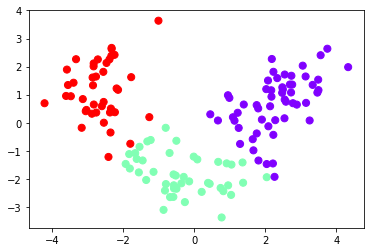

In [47]:
#聚类散点图
import matplotlib.pyplot as plt

plt.scatter(x = wine_std_train_Pca[:,0], y = wine_std_train_Pca[:,1], c = kmeans.labels_, s=50, cmap='rainbow')

plt.show()

2.对比真实标签和聚类标签求取FMI

In [18]:
kmeansLabel = kmeans.predict(wine_std_test_Pca)
kmeansLabel#聚类标签

array([1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2])

In [19]:
wine_Ytest#真实标签
#两者仅在第九个位置处有所不同

array([1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2])

In [20]:
from sklearn.metrics import fowlkes_mallows_score
score = fowlkes_mallows_score(kmeansLabel,wine_Ytest)#构建FMI评价
score

0.9379681482232883

In [21]:
##############测试离差标准化和标准差标准化结果的差异################

In [22]:
from sklearn.cluster import KMeans#导入模块
kmeans = KMeans(n_clusters = 3,random_state=231).fit(wine_MM_train_Pca,wine_Ytrain)#将随机种子设置为231时，答案正确，但是score不正确
kmeansLabel = kmeans.predict(wine_MM_test_Pca)
from sklearn.metrics import fowlkes_mallows_score
score = fowlkes_mallows_score(kmeansLabel,wine_Ytest)#构建FMI评价
score

0.9379681482232883

wine数据集使用离差标准化和标准差标准化的结果的差异并没有多大

3.在聚类数目为2-10类时，确认最优聚类数目

In [23]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=231).fit(wine_std_train_Pca,wine_Ytrain)#将随机种子设置为231时，答案正确，但是score不正确
    kmeansLabel = kmeans.predict(wine_std_test_Pca)
    score = fowlkes_mallows_score(kmeansLabel,wine_Ytest)#构建FMI评价
    print(i,'个聚类时的准确率',score)

1 个聚类时的准确率 0.5662463427121809
2 个聚类时的准确率 0.6143934235264181
3 个聚类时的准确率 0.9379681482232883
4 个聚类时的准确率 0.8181416897282133
5 个聚类时的准确率 0.7488869628777877
6 个聚类时的准确率 0.6788214189875552
7 个聚类时的准确率 0.6409321497463897
8 个聚类时的准确率 0.5834427727878205
9 个聚类时的准确率 0.6486848843683047
10 个聚类时的准确率 0.5716053474796459


由上述数据可以看出，聚类为3时，准确率最高，模型最好。

3.使用轮廓系数评价法评价K-Means聚类模型

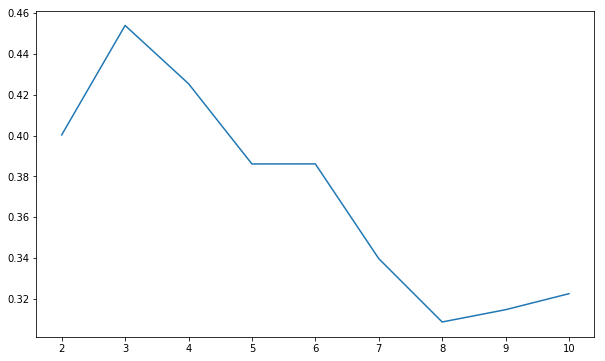

In [32]:
from sklearn.metrics import silhouette_score#导入函数
import matplotlib.pyplot as plt#用于绘图
%matplotlib inline
silhouetteScore = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=231).fit(wine_std_train_Pca,wine_Ytrain)#建立模型
   # res = kmeans.predict(wine_MM_test_Pca)
    score = silhouette_score(wine_std_train_Pca,kmeans.labels_)#得到轮廓系数
    silhouetteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouetteScore,linewidth = 1.5,linestyle="-")#绘制折线图
plt.show()

由上图可以看出，聚类为3时，准确率最高，模型最好。

4.求取Calinski-Harabasz指数，确定最优聚类数目

In [24]:
from sklearn.metrics import calinski_harabaz_score#calinski_harabaz评价法
for i in range(2,11):#评价聚类模型2-10
     kmeans = KMeans(n_clusters=i,random_state=231).fit(wine_std_train_Pca,wine_Ytrain)#建立模型
   
     score = calinski_harabaz_score(wine_std_train_Pca,kmeans.labels_)#得到轮廓系数
     print(i,'个聚类的calinski_harabaz系数',score)

2 个聚类的calinski_harabaz系数 107.57285896019314
3 个聚类的calinski_harabaz系数 138.17380453586605
4 个聚类的calinski_harabaz系数 123.63707852096033
5 个聚类的calinski_harabaz系数 113.72687206601685
6 个聚类的calinski_harabaz系数 107.674456413425
7 个聚类的calinski_harabaz系数 104.57324359364014
8 个聚类的calinski_harabaz系数 99.75433316313772
9 个聚类的calinski_harabaz系数 98.34198955395887
10 个聚类的calinski_harabaz系数 94.70969751732333


由上述数据可得，在聚类数目为3时，calinski_harabaz系数最大，聚类模型最优。

# 构建基于wine数据集的SVM分类模型

1.读取wine数据集，区分标签和数据<br>
2.将wine数据集划分为训练集和测试集<br>
3.使用离差标准化方法标准化wine数据集<br>
均在前面的过程中进行了操作<br>
得到的离差标准化的数据集为<br>
训练集：X wine_MM_train_Pca Y wine_Ytrain<br>
测试集：X wine_MM_test_Pca  Y wine_Ytest<br>

4.构建SVM模型，并预测测试集结果

In [25]:
from sklearn.svm import SVC#导入模块
svm = SVC().fit(wine_MM_train_Pca,wine_Ytrain)#jia

In [26]:
res = svm.predict(wine_MM_test_Pca)#预测结果
print("预测结果")
res

预测结果


array([1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2])

In [27]:
wine_Ytest

array([1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2])

5.打印出分类报告，评价分类模型性能

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
print("使用SVM预测wine数据的准确率",accuracy_score(res,wine_Ytest))
print("使用SVM预测wine数据的精确率",precision_score(res,wine_Ytest,average=None))
print("使用SVM预测wine数据的召回率",recall_score(res,wine_Ytest,average=None))
print("使用SVM预测wine数据的F1值",f1_score(res,wine_Ytest,average=None))
print("使用SVM预测wine数据的ck系数",cohen_kappa_score(res,wine_Ytest))
#二分类

使用SVM预测wine数据的准确率 0.9722222222222222
使用SVM预测wine数据的精确率 [1.         0.92857143 1.        ]
使用SVM预测wine数据的召回率 [0.92307692 1.         1.        ]
使用SVM预测wine数据的F1值 [0.96       0.96296296 1.        ]
使用SVM预测wine数据的ck系数 0.958041958041958


6.使用其他的模型进行预测（LAD,逻辑回归）

In [28]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)


X_r = lda.fit(wine_Xtrain,wine_Ytrain)

print('LDA结果',X_r.predict(wine_Xtest))

print('正确结果',wine_Ytest)

print('准确率',X_r.score(wine_Xtest,wine_Ytest))

LDA结果 [1 0 1 2 2 0 1 1 1 0 1 2 0 0 2 1 2 1 1 2 0 2 1 2 1 0 2 1 0 0 0 2 0 1 0 2]
正确结果 [1 0 1 2 2 0 1 1 1 0 1 1 0 0 2 1 2 1 1 2 0 2 1 2 1 0 2 1 0 0 0 2 0 1 0 2]
准确率 0.9722222222222222


In [29]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(wine_std_train_Pca, wine_Ytrain)
print('Training accuracy:', lr.score(wine_std_train_Pca, wine_Ytrain))
print('Test accuracy:', lr.score(wine_std_test_Pca, wine_Ytest))


Training accuracy: 0.971830985915493
Test accuracy: 0.9444444444444444


# 实训4构建基于wine_quality数据集的回归模型

1.根据wine_quality数据集处理的结果，构建线性回归模型

In [27]:
from sklearn.linear_model import LinearRegression#导入模块
clf = LinearRegression().fit(q_std_train_Pca,quality_Ytrain)
clf_pred = clf.predict(q_std_test_Pca)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,explained_variance_score,r2_score
print('wine_quality数据线性回归模型的 平均绝对误差 ',mean_absolute_error(quality_Ytest,clf_pred))
print('wine_quality数据线性回归模型的 均方误差 ',mean_squared_error(quality_Ytest,clf_pred))
print('wine_quality数据线性回归模型的 中值绝对误差 ',median_absolute_error(quality_Ytest,clf_pred))
print('wine_quality数据线性回归模型的 可解释方差 ',explained_variance_score(quality_Ytest,clf_pred))
print('wine_quality数据线性回归模型的 r方值 ',r2_score(quality_Ytest,clf_pred))

wine_quality数据线性回归模型的 平均绝对误差  0.5468181916388624
wine_quality数据线性回归模型的 均方误差  0.4621057010649975
wine_quality数据线性回归模型的 中值绝对误差  0.4645889149557836
wine_quality数据线性回归模型的 可解释方差  0.2839591215480297
wine_quality数据线性回归模型的 r方值  0.2838606485099623


In [36]:
from sklearn.ensemble import  GradientBoostingRegressor
GBR_q = GradientBoostingRegressor().fit(q_std_train_Pca,quality_Ytrain)

In [37]:
GBR_q_pred = GBR_q.predict(q_std_test_Pca)

In [38]:
print('wine_quality数据梯度提升回归模型的 平均绝对误差 ',mean_absolute_error(quality_Ytest,GBR_q_pred))
print('wine_quality数据梯度提升回归模型的 均方误差 ',mean_squared_error(quality_Ytest,GBR_q_pred))
print('wine_quality数据梯度提升回归模型的 中值绝对误差 ',median_absolute_error(quality_Ytest,GBR_q_pred))
print('wine_quality数据梯度提升回归模型的 可解释方差 ',explained_variance_score(quality_Ytest,GBR_q_pred))
print('wine_quality数据梯度提升回归模型的 r方值 ',r2_score(quality_Ytest,GBR_q_pred))

wine_quality数据梯度提升回归模型的 平均绝对误差  0.5275390144874421
wine_quality数据梯度提升回归模型的 均方误差  0.43235329786141874
wine_quality数据梯度提升回归模型的 中值绝对误差  0.4248574955100577
wine_quality数据梯度提升回归模型的 可解释方差  0.32997726577662956
wine_quality数据梯度提升回归模型的 r方值  0.32996885857180724


由上述数据可知，wine_quality数据梯度提升回归模型性能更好